In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import warnings
warnings.simplefilter('ignore')

from skimage.metrics import peak_signal_noise_ratio
from scipy import ndimage as nd
from skimage import io
from skimage import img_as_float
from skimage.restoration import denoise_tv_chambolle,denoise_wavelet,denoise_nl_means,estimate_sigma

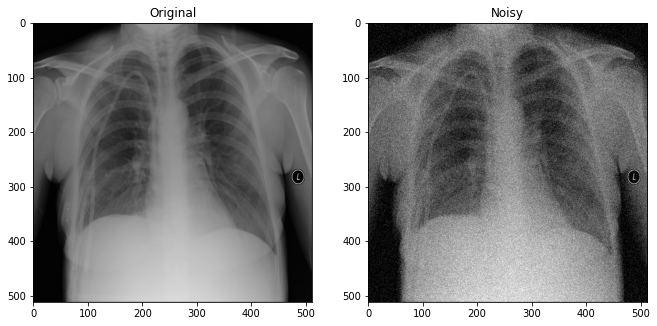

In [ ]:
gauss_img = plt.imread("/content/drive/MyDrive/Gaussian/Gaussian/Gauss_1.png")
normal_img = plt.imread("/content/drive/MyDrive/Gaussian/Normal/Normal-1.png")

plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(normal_img,cmap='gray'),plt.title('Original')
plt.subplot(122)
plt.imshow(gauss_img,cmap='gray'),plt.title('Noisy')
plt.show()

In [ ]:
print(normal_img.shape)
print(gauss_img.shape)

(512, 512, 3)
(512, 512)


In [ ]:
normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2GRAY)
normal_img.shape

(512, 512)

# BM3D

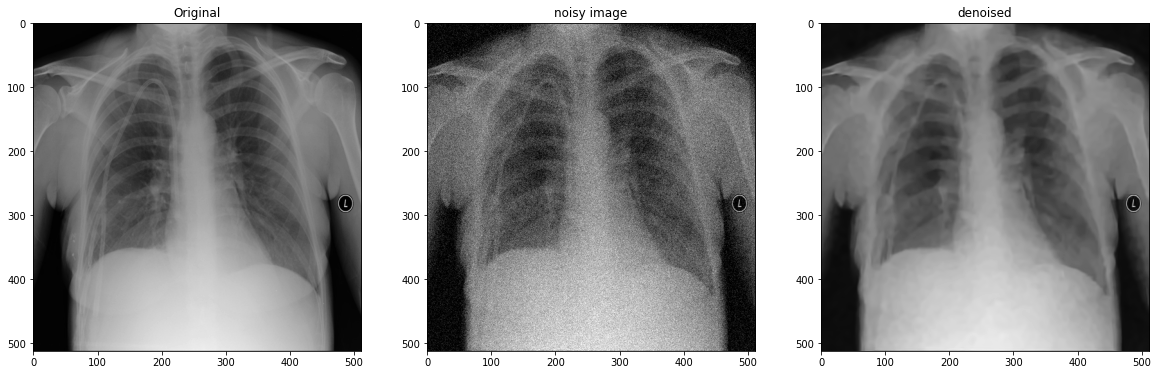

In [ ]:
import bm3d
denoised_image_bm3d = bm3d.bm3d(gauss_img, sigma_psd=0.1, stage_arg=bm3d.BM3DStages.ALL_STAGES)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoised_image_bm3d,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoised_image_bm3d)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  36.45828742143577


# Gaussian Filter

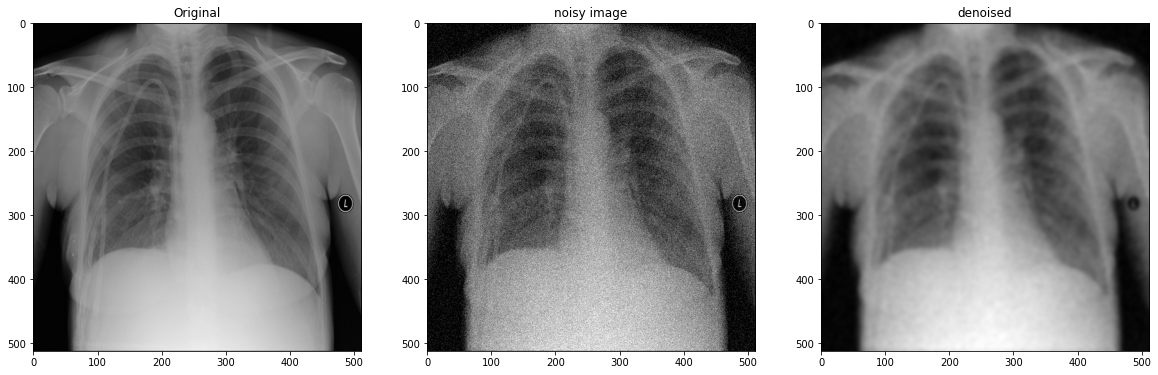

In [ ]:
denoise_img_gaussian = nd.gaussian_filter(gauss_img,sigma=3)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoise_img_gaussian,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_gaussian)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  33.139664480239716


# Total Variation

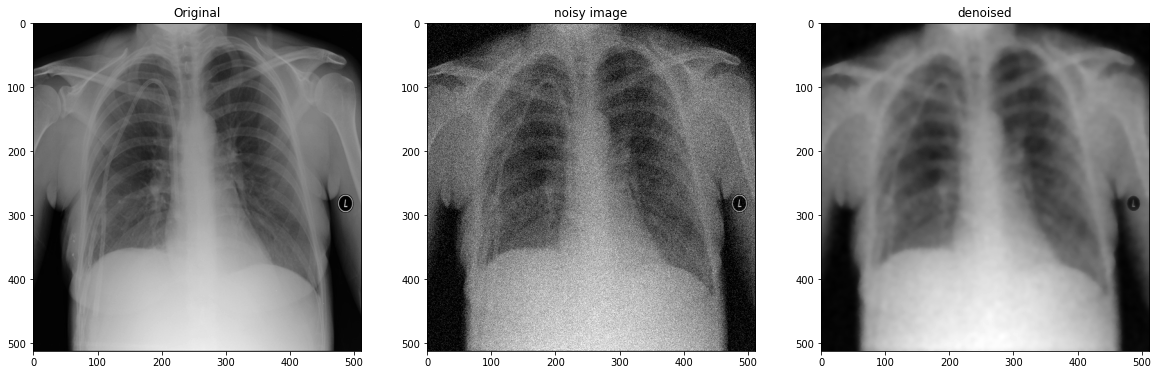

In [ ]:
denoise_img_chambolle = denoise_tv_chambolle(gauss_img,weight=0.3,multichannel=False)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoise_img_chambolle,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_chambolle)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  33.4586813699375


# wavelet transform

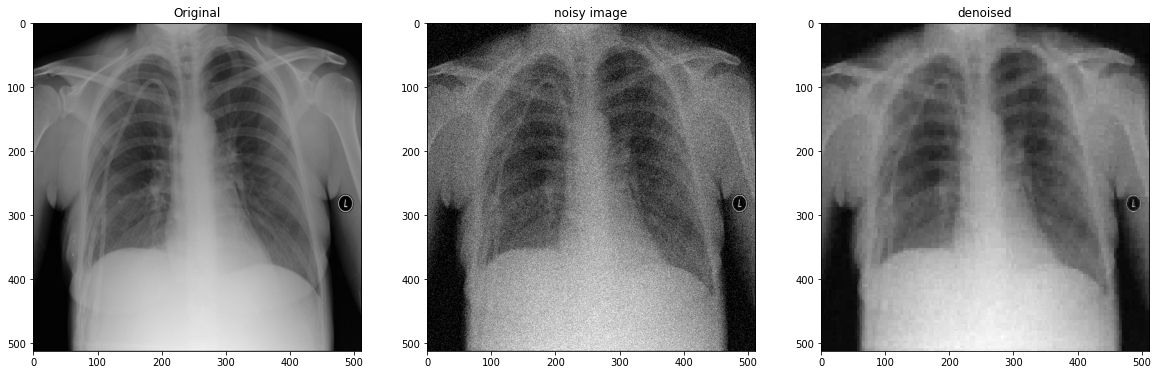

In [ ]:
denoise_img_wavelet = denoise_wavelet(gauss_img,multichannel=False,method='BayesShrink',
                                      mode='soft',rescale_sigma=True)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoise_img_wavelet,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_wavelet)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  32.77008987171306


# n1 means

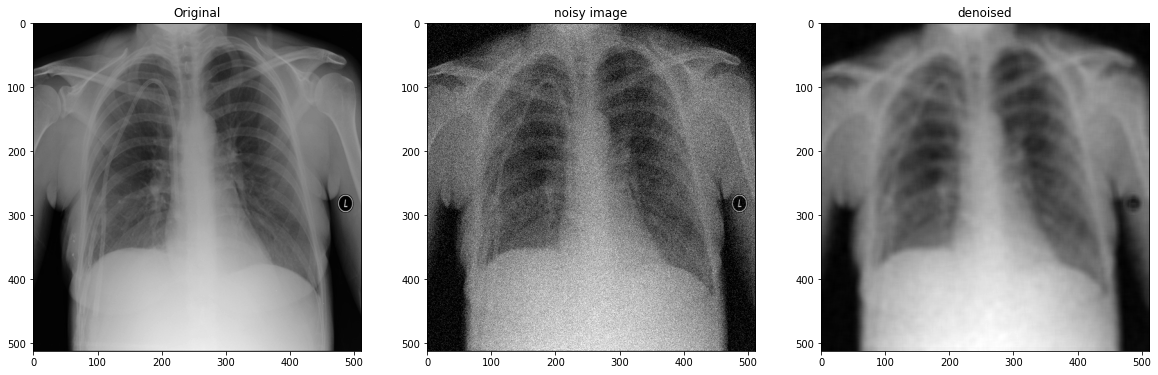

In [ ]:
sigma_est = np.mean(estimate_sigma(gauss_img,multichannel=False))
img_nl = denoise_nl_means(gauss_img,sigma_est,h=2.15,patch_distance=5)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(img_nl,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, img_nl)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  32.54432812147466


# Median Filter

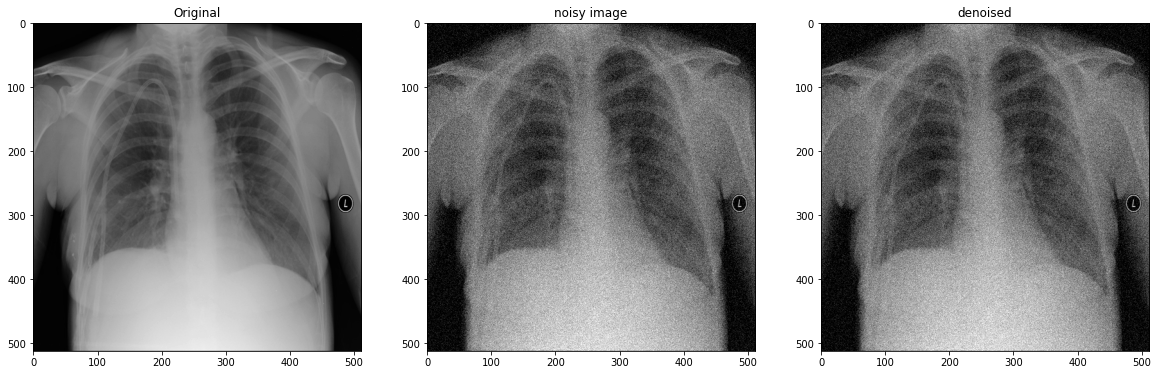

In [ ]:
median_image = nd.median_filter(gauss_img, size = 1)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(median_image,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, median_image)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  22.343098338981005


# Bilateral Filter

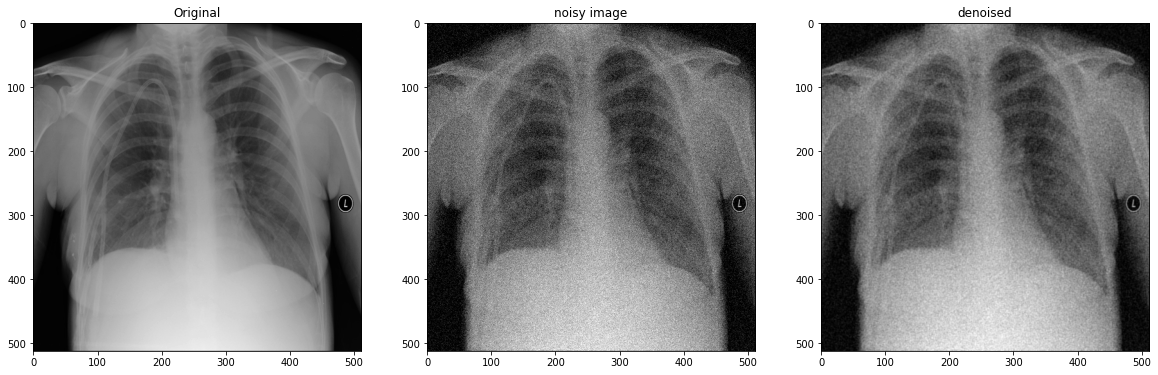

In [ ]:
bilateral_blur = cv2.bilateralFilter(gauss_img,1,512,512)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(gauss_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(bilateral_blur,cmap="gray"),plt.title('denoised')
plt.show()

In [ ]:
noise_psnr = peak_signal_noise_ratio(normal_img, gauss_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, bilateral_blur)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  22.343098338981005
PSNR of cleaned image =  28.860503063701266
